In [742]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import seaborn as sns

In [743]:
#GOAL: predict the number of audience based on the name of the movie 영화제목과 영화광객수 
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('moviesubmission.csv')


In [744]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [745]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [746]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [747]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [748]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [749]:
train.describe()
# pd.options.display.float_format = '{:.1f}'.format


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [750]:
genregrp = train['box_off_num'].groupby(train['genre']).mean().sort_values(ascending=True)
genregrp

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [751]:
train['title'].astype(str)

0         개들의 전쟁
1           내부자들
2      은밀하게 위대하게
3       나는 공무원이다
4           불량남녀
         ...    
595           해무
596         파파로티
597        살인의 강
598       악의 연대기
599          베를린
Name: title, Length: 600, dtype: object

<Axes: >

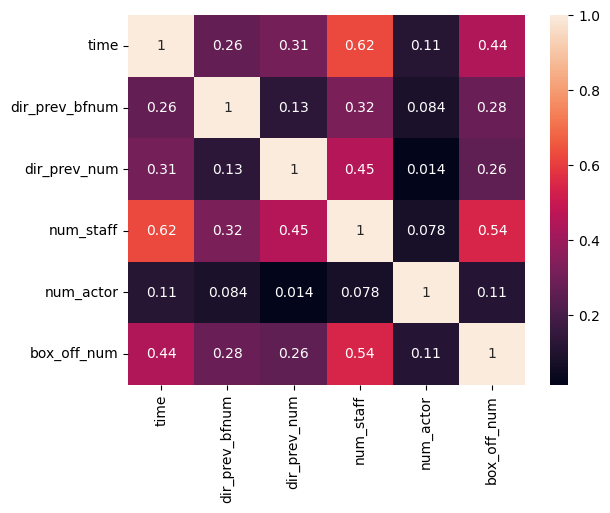

In [752]:
correlations = train[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num']]
correlations = correlations.corr()
sns.heatmap(correlations, annot=True)

In [753]:
pd.reset_option('display.float_format')


In [754]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [755]:
train[train['dir_prev_bfnum'].isna()]
test[test['dir_prev_bfnum'].isna()]

# train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3
...,...,...,...,...,...,...,...,...,...,...,...
235,타이밍,(주)스톰픽쳐스코리아,애니메이션,2015-12-10,100,15세 관람가,민경조,NaN,0,56,1
237,어떤이의 꿈,하준사,드라마,2015-11-26,72,12세 관람가,조성규,NaN,0,29,3
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4


In [756]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [757]:
train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [758]:
# Assuming 'genre' is the column with Korean genre values
genre_mapping = {
    '액션': 'action',
    '느와르': 'noir',
    '코미디': 'comedy',
    '다큐멘터리': 'documentary',
    '뮤지컬': 'musical',
    '드라마': 'drama',
    '멜로/로맨스': 'mello/romance',
    '공포': 'terror',
    '서스펜스': 'suspense',
    '애니메이션': 'animation',
    '미스터리': 'mystery',
    'SF': 'scifi'
}

# Map the values in the 'genre' column
train['genre'] = train['genre'].map(genre_mapping)


genre_mapping = {
    '액션': 'action',
    '느와르': 'noir',
    '코미디': 'comedy',
    '다큐멘터리': 'documentary',
    '뮤지컬': 'musical',
    '드라마': 'drama',
    '멜로/로맨스': 'mello/romance',
    '공포': 'terror',
    '서스펜스': 'suspense',
    '애니메이션': 'animation',
    '미스터리': 'mystery',
    'SF': 'scifi'
}

# Map the values in the 'genre' column
test['genre'] = test['genre'].map(genre_mapping)


In [759]:
train['release_m'] = train['release_time'].str[:7]
train['release_y'] = train['release_time'].str[:4]
test['release_m'] = test['release_time'].str[:7]
test['release_y'] = test['release_time'].str[:4]
# train['release_time'] = pd.to_datetime(train['release_time'])

train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y
0,개들의 전쟁,롯데엔터테인먼트,action,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012-11,2012
1,내부자들,(주)쇼박스,noir,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11,2015
2,은밀하게 위대하게,(주)쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06,2013
3,나는 공무원이다,(주)NEW,comedy,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07,2012
4,불량남녀,쇼박스(주)미디어플렉스,comedy,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11,2010


In [760]:
famous = train[train['director']=='장철수']
famous

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y
2,은밀하게 위대하게,(주)쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06,2013


In [761]:
famous = train['box_off_num'].sort_values(ascending=False)
famous

372    14262766
362    12983841
530    12811435
498    12706663
460    12323595
         ...   
481          36
410          10
338           8
324           2
432           1
Name: box_off_num, Length: 600, dtype: int64

In [762]:
train.iloc[530]

title                7번방의 선물
distributor           (주)NEW
genre                 comedy
release_time      2013-01-23
time                     127
screening_rat        15세 관람가
director                 이환경
dir_prev_bfnum      819049.5
dir_prev_num               2
num_staff                300
num_actor                  8
box_off_num         12811435
release_m            2013-01
release_y               2013
Name: 530, dtype: object

In [763]:
#Genre distribution by release year 
hello = pd.crosstab(train['release_y'], train['genre'])
hello

genre,action,animation,comedy,documentary,drama,mello/romance,musical,mystery,noir,scifi,suspense,terror
release_y,,,,,,,,,,,,
2010,2,0,12,14,36,11,0,0,5,1,0,9
2011,7,6,5,13,31,7,2,1,2,3,0,3
2012,5,2,12,13,35,9,0,4,4,1,0,3
2013,6,1,4,15,36,12,1,5,4,2,1,8
2014,1,7,11,23,47,18,1,3,5,2,1,8
2015,7,5,9,15,36,21,1,4,7,4,0,11


Text(0.5, 1.0, 'Genre Distribution by Release Year')

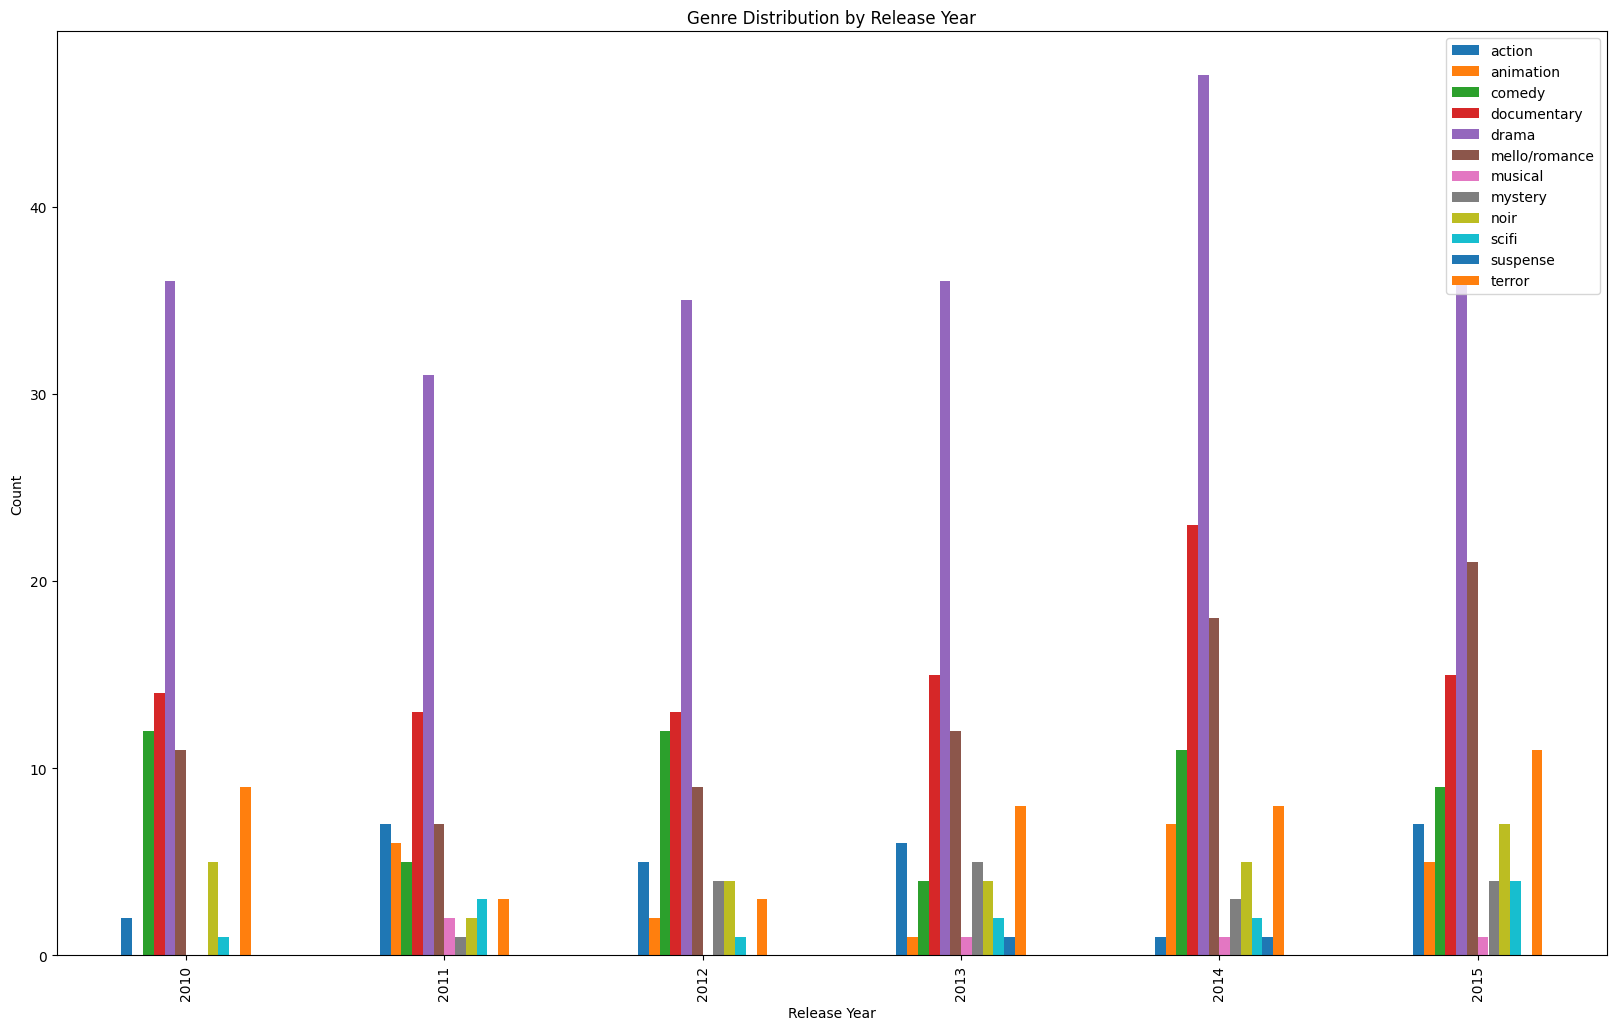

In [764]:
hello.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Genre Distribution by Release Year')

In [765]:
totaldata = pd.merge(train, test)
totaldata

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y


In [766]:
#temp_var = train['genre'].groupby(train['release_y']).count()


Text(0.5, 1.0, 'Box Office Count by Release Year')

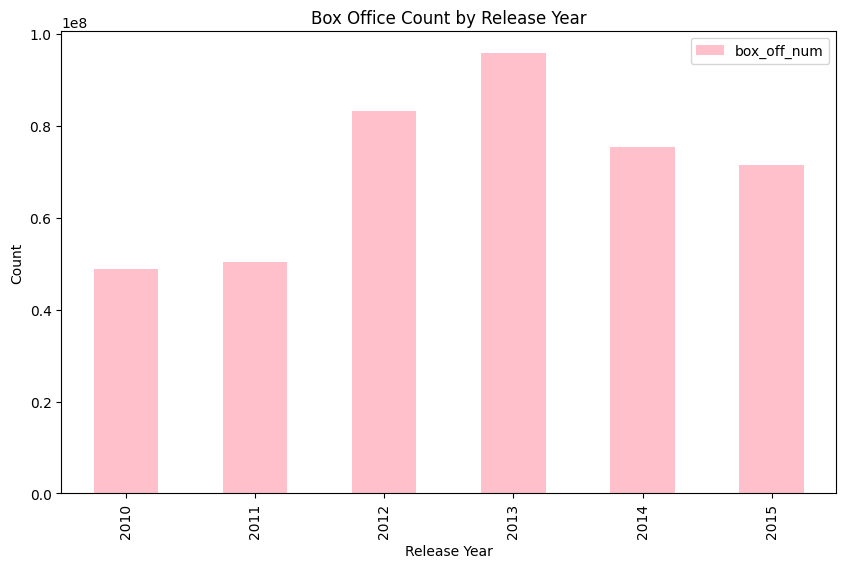

In [767]:
temp_var = train['box_off_num'].groupby(train['release_y']).sum()
temp_var.plot(kind='bar', figsize=(10, 6), color='pink')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Box Office Count by Release Year')

Text(0.5, 1.0, 'Staff Number by Release Year')

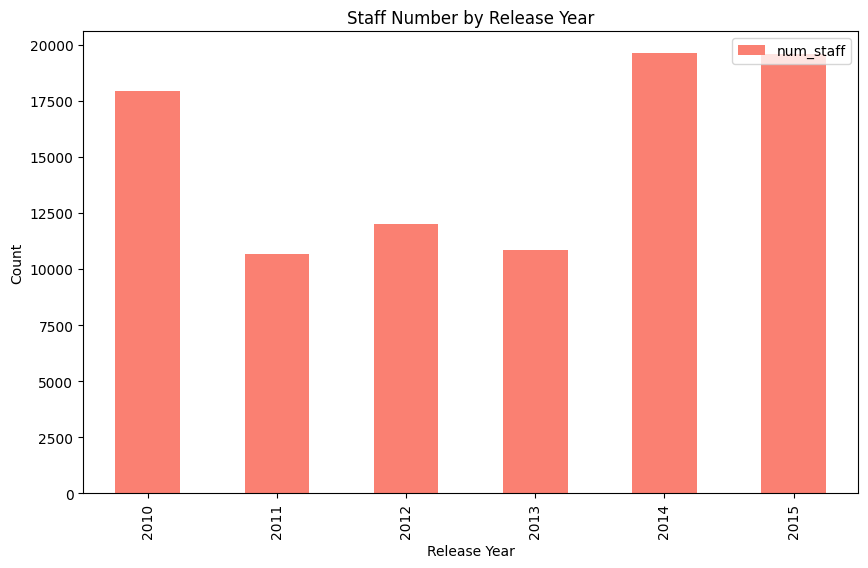

In [768]:
temp_var = train['num_staff'].groupby(train['release_y']).sum()
temp_var
temp_var.plot(kind='bar', figsize=(10, 6), color='salmon')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Staff Number by Release Year')

Text(0.5, 1.0, 'Actor Number by Release Year')

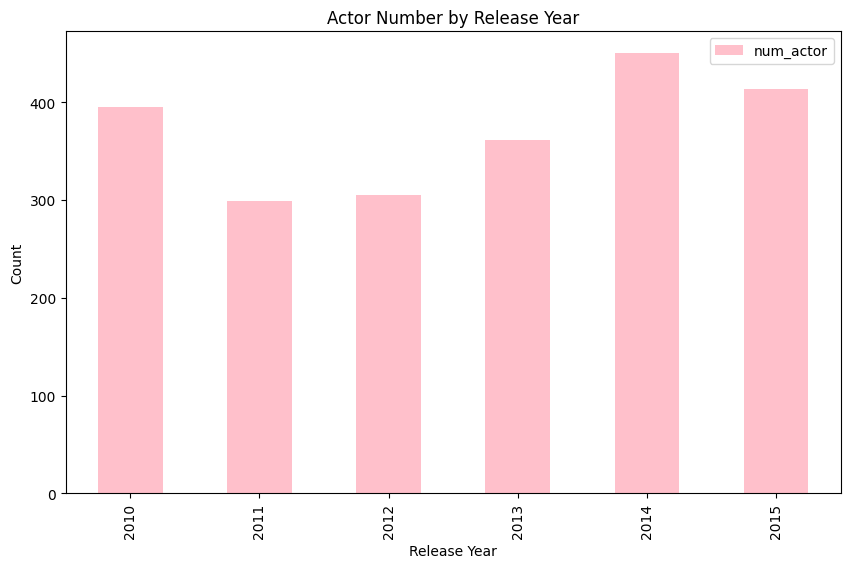

In [769]:
temp_var = train['num_actor'].groupby(train['release_y']).sum()
temp_var.plot(kind='bar', figsize=(10, 6), color='pink')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Actor Number by Release Year')

Text(0.5, 1.0, 'Previous released movie number by Release Year')

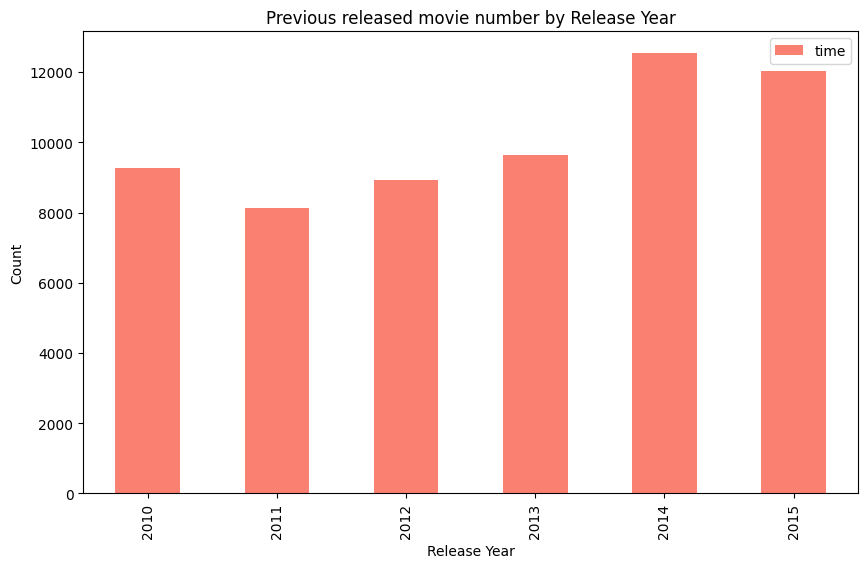

In [770]:
temp_var = train['time'].groupby(train['release_y']).sum()
temp_var
temp_var.plot(kind='bar', figsize=(10, 6), color='salmon')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Previous released movie number by Release Year')

Text(0.5, 1.0, 'Director Number by Release Year')

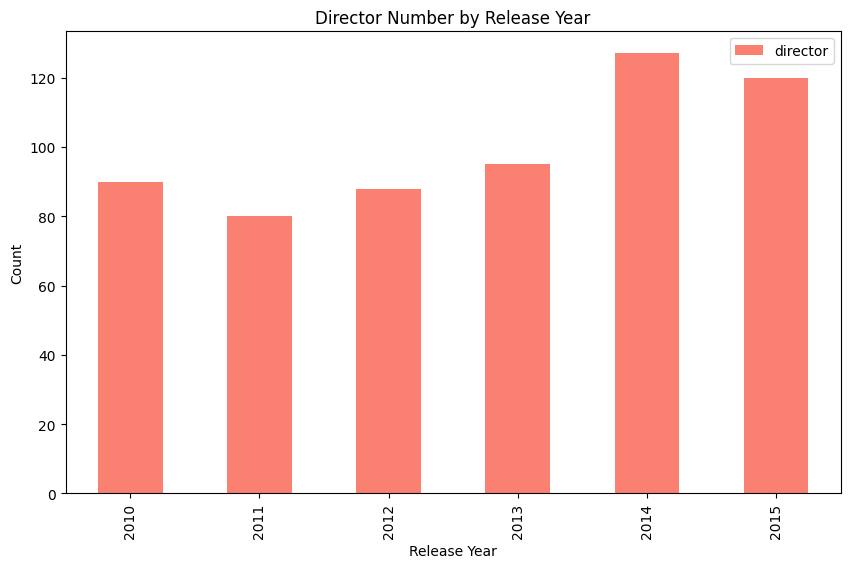

In [771]:
temp_var = train['director'].groupby(train['release_y']).count()
temp_var
temp_var.plot(kind='bar', figsize=(10, 6), color='salmon')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Director Number by Release Year')

In [772]:
len(train['director'].unique())

472

In [773]:
#is 2013 the year that has the most 1st rank movie 
train['movie_rank'] = pd.qcut(train['box_off_num'], q=[0, 0.25, 0.50, 0.75, 0.97, 1], labels=[5,4,3,2,1])

In [774]:
ranking = pd.crosstab(train['movie_rank'], train['release_y'])
ranking

release_y,2010,2011,2012,2013,2014,2015
movie_rank,,,,,,
5,21,22,24,19,25,39
4,19,15,18,27,44,27
3,25,20,18,24,33,30
2,24,21,26,18,22,21
1,1,2,2,7,3,3


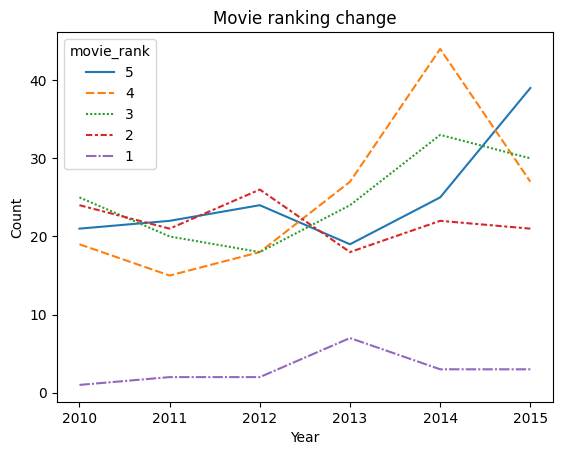

In [775]:

ax = sns.lineplot(data=ranking.T)
plt.title('Movie ranking change')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [776]:
train['movie_rank'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           600 non-null    object  
 1   distributor     600 non-null    object  
 2   genre           600 non-null    object  
 3   release_time    600 non-null    object  
 4   time            600 non-null    int64   
 5   screening_rat   600 non-null    object  
 6   director        600 non-null    object  
 7   dir_prev_bfnum  600 non-null    float64 
 8   dir_prev_num    600 non-null    int64   
 9   num_staff       600 non-null    int64   
 10  num_actor       600 non-null    int64   
 11  box_off_num     600 non-null    int64   
 12  release_m       600 non-null    object  
 13  release_y       600 non-null    object  
 14  movie_rank      600 non-null    category
dtypes: category(1), float64(1), int64(5), object(8)
memory usage: 66.5+ KB


In [777]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank
0,개들의 전쟁,롯데엔터테인먼트,action,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012-11,2012,3
1,내부자들,(주)쇼박스,noir,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11,2015,1
2,은밀하게 위대하게,(주)쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06,2013,1
3,나는 공무원이다,(주)NEW,comedy,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07,2012,3
4,불량남녀,쇼박스(주)미디어플렉스,comedy,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11,2010,2


In [778]:
examine2013 = train.loc[(train['release_y']=='2013') & (train['movie_rank']==1)]
examine2013

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank
2,은밀하게 위대하게,(주)쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06,2013,1
101,관상,(주)쇼박스,drama,2013-09-11,139,15세 관람가,한재림,1242778.00,2,298,6,9135806,2013-09,2013,1
122,변호인,(주)NEW,drama,2013-12-18,127,15세 관람가,양우석,0.00,0,311,5,11374879,2013-12,2013,1
496,설국열차,CJ 엔터테인먼트,scifi,2013-08-01,125,15세 관람가,봉준호,0.00,0,67,10,9350351,2013-08,2013,1
530,7번방의 선물,(주)NEW,comedy,2013-01-23,127,15세 관람가,이환경,819049.50,2,300,8,12811435,2013-01,2013,1
561,숨바꼭질,(주)NEW,terror,2013-08-14,107,15세 관람가,허정,0.00,0,249,3,5604106,2013-08,2013,1
599,베를린,CJ 엔터테인먼트,action,2013-01-30,120,15세 관람가,류승완,0.00,0,363,5,7166532,2013-01,2013,1


In [779]:
examine2014 = train.loc[(train['release_y']=='2014') & (train['movie_rank']==1)]
examine2014

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank
372,국제시장,CJ 엔터테인먼트,drama,2014-12-17,126,12세 관람가,윤제균,0.000000e+00,0,869,4,14262766,2014-12,2014,1
476,수상한 그녀,CJ 엔터테인먼트,comedy,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725,2014-01,2014,1
505,해적: 바다로 간 산적,롯데엔터테인먼트,scifi,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208,2014-08,2014,1


In [780]:
examine2015 = train.loc[(train['release_y']=='2015') & (train['movie_rank']==1)]
examine2015

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank
1,내부자들,(주)쇼박스,noir,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015-11,2015,1
322,히말라야,CJ 엔터테인먼트,drama,2015-12-16,124,12세 관람가,이석훈,3549473.0,4,520,2,7759711,2015-12,2015,1
498,암살,(주)쇼박스,action,2015-07-22,139,15세 관람가,최동훈,5169479.0,4,628,3,12706663,2015-07,2015,1


In [781]:
#divide according to time range 
bins_label = ['1 to 1.5h','1.5h to 2h','2h to 3h']
bins = [60, 90, 120, 180]

train['runtime'] = pd.cut(train['time'], bins, right=False, labels=bins_label)

temp_var = pd.crosstab(train['release_y'], train['runtime'])
temp_var.head()




runtime,1 to 1.5h,1.5h to 2h,2h to 3h
release_y,,,
2010,19,61,10
2011,20,45,15
2012,19,55,13
2013,20,59,16
2014,47,61,19


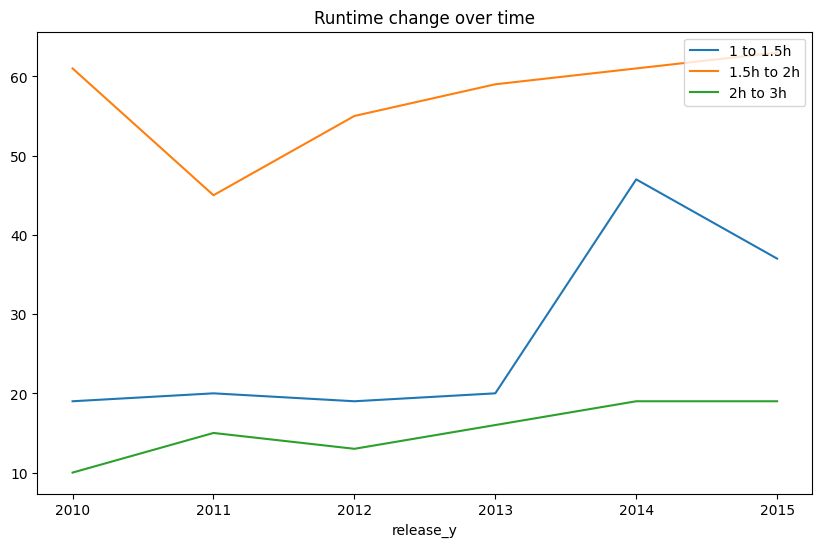

In [782]:
temp_var.plot(figsize=(10,6))
plt.title('Runtime change over time')
plt.legend(loc='upper right')
plt.show()

In [783]:
import os

In [784]:
import sys

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.draw()
/

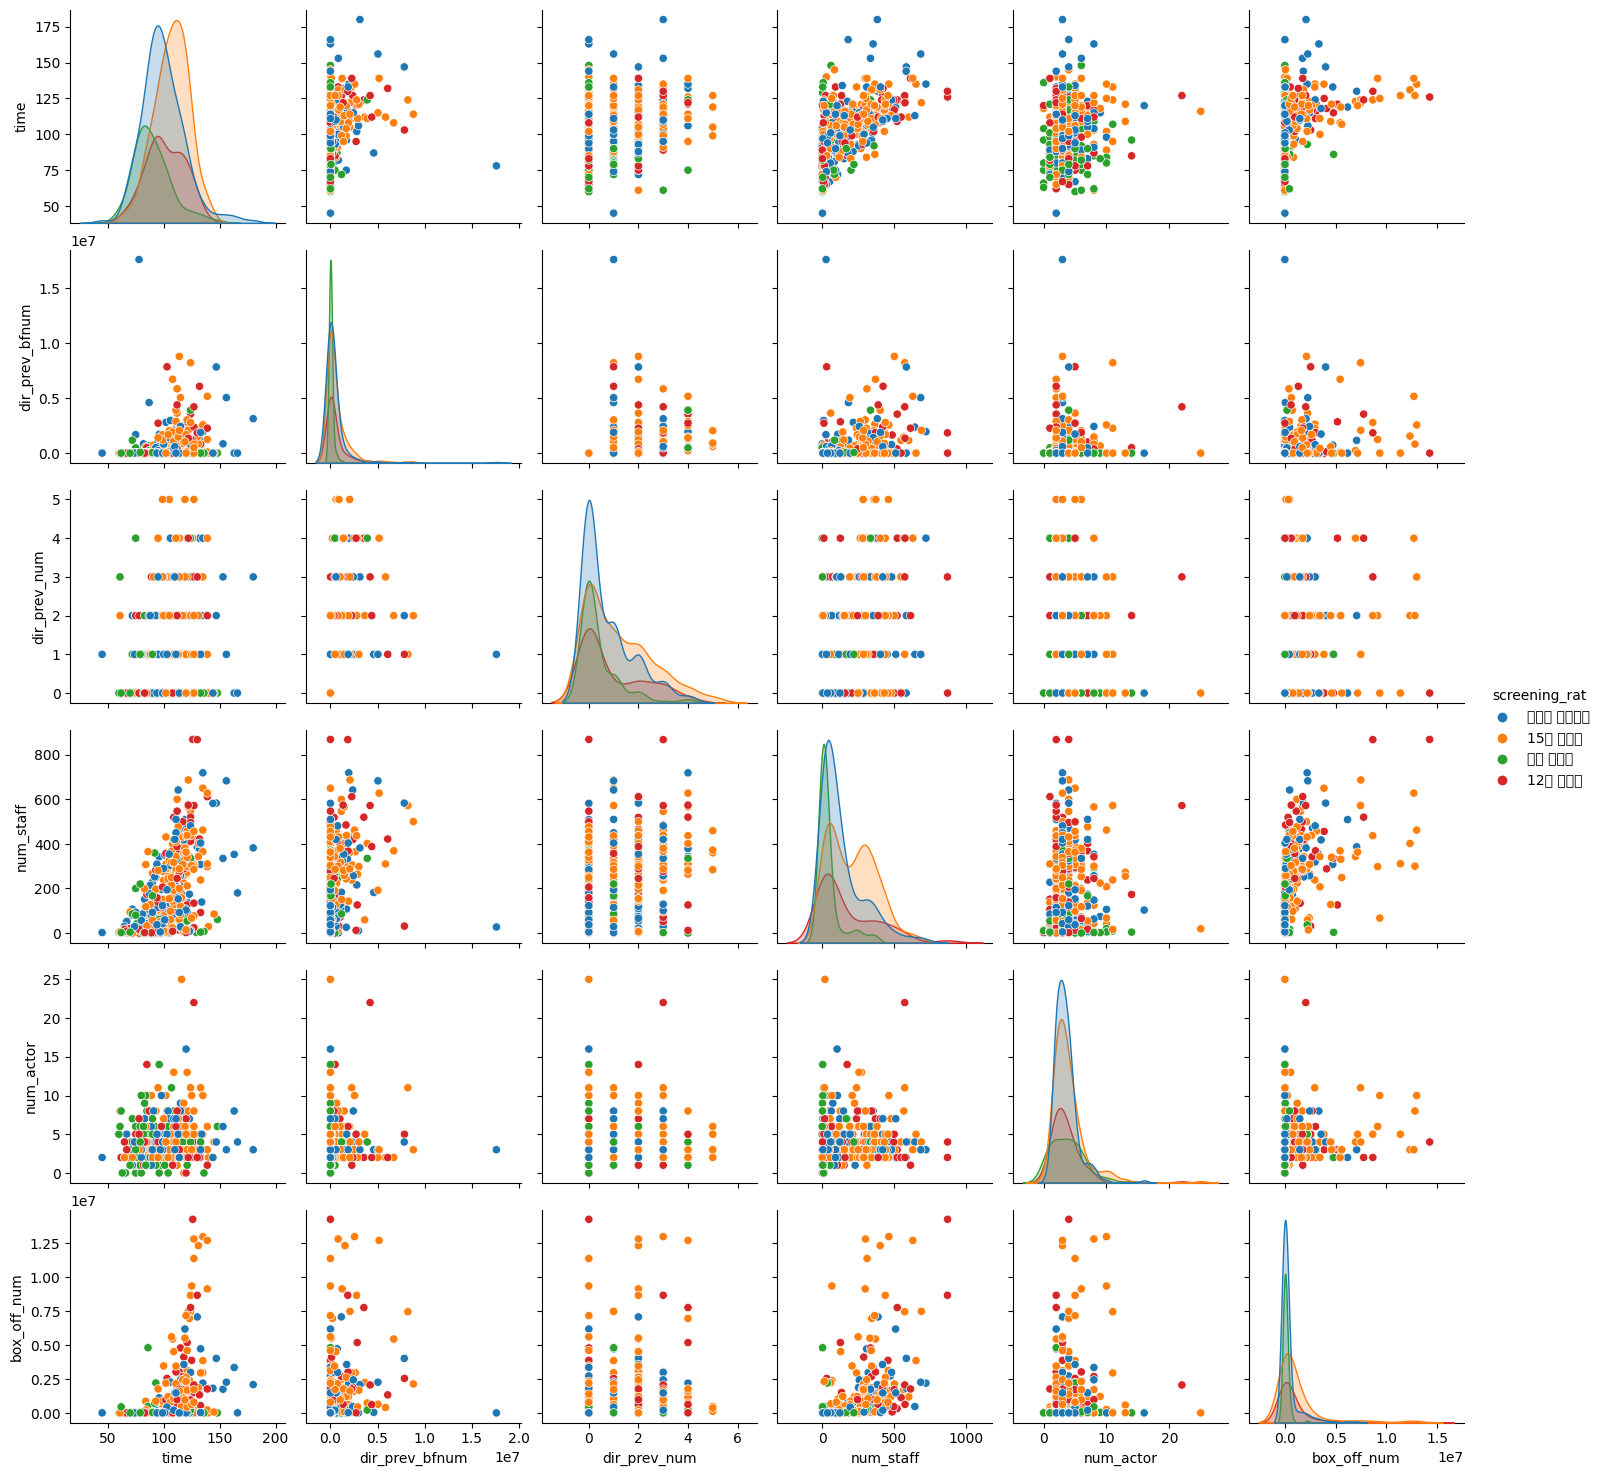

In [785]:
movies_tr_obj = train.select_dtypes(include=['object']).copy()
movies_tr_num = train.select_dtypes(include=['int']).copy()
g = sns.pairplot(train, hue="screening_rat")

In [786]:
train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [787]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank,runtime
0,개들의 전쟁,롯데엔터테인먼트,action,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012-11,2012,3,1.5h to 2h
1,내부자들,(주)쇼박스,noir,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11,2015,1,2h to 3h
2,은밀하게 위대하게,(주)쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06,2013,1,2h to 3h
3,나는 공무원이다,(주)NEW,comedy,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07,2012,3,1.5h to 2h
4,불량남녀,쇼박스(주)미디어플렉스,comedy,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11,2010,2,1.5h to 2h


In [788]:
#전처리 for CJ
replace_dict = {
    '(주)NEW': 'NEW',
    'CJ 엔터테인먼트': 'CJ',
    'CJ E&M Pictures': 'CJ',
    'CJ E&M 영화부문': 'CJ',
    '(주)쇼박스': '쇼박스',
    '쇼박스(주)미디어플렉스': '쇼박스'
}

# Replace values in the specified column using the dictionary
train['distributor'] = train['distributor'].replace(replace_dict)

top_distributor = train['box_off_num'].groupby([train['distributor']]).sum().sort_values(ascending=False)
top_distributor = top_distributor.head(10)

Text(0.5, 1.0, 'Top Distributor in the industry')

/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  func(*args, **kwargs)
/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  func(*args, **kwargs)
/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  func(*args, **kwargs)
/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/Users/User/Library/Python/3.11/lib/python/site-packages/IPython/core/e

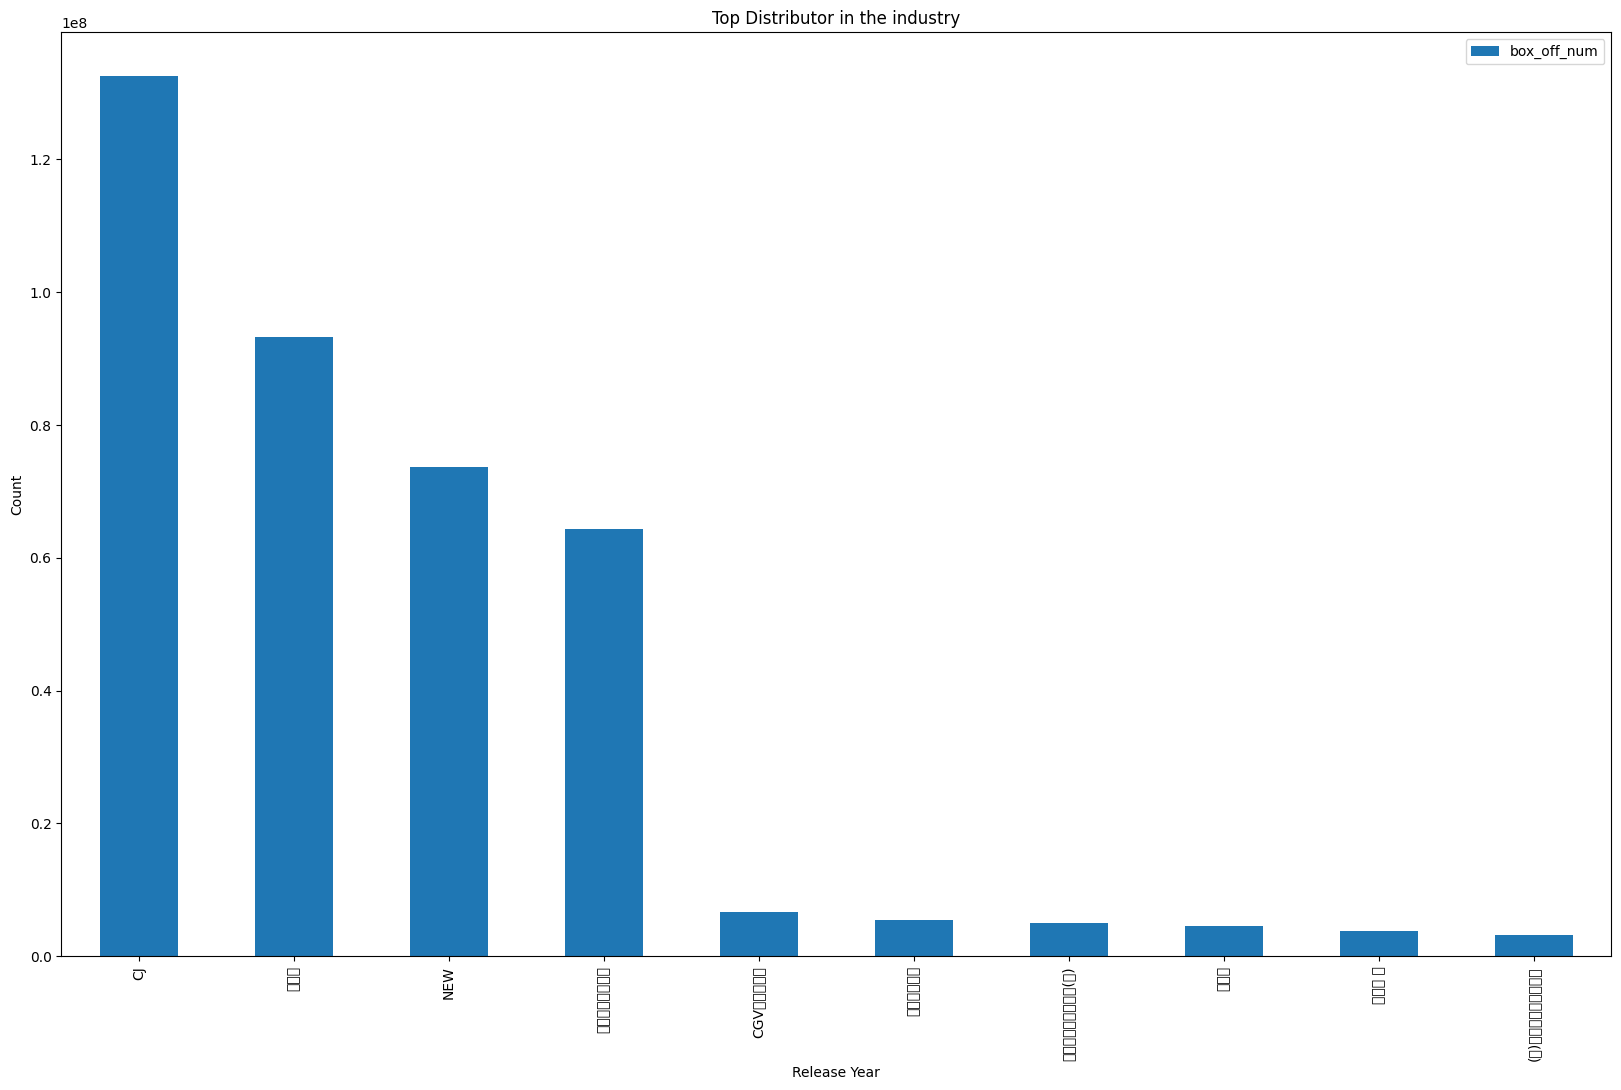

In [789]:
top_distributor.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Top Distributor in the industry')

In [790]:
totaldata = pd.concat([train, test])
totaldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 0 to 242
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           843 non-null    object  
 1   distributor     843 non-null    object  
 2   genre           843 non-null    object  
 3   release_time    843 non-null    object  
 4   time            843 non-null    int64   
 5   screening_rat   843 non-null    object  
 6   director        843 non-null    object  
 7   dir_prev_bfnum  843 non-null    float64 
 8   dir_prev_num    843 non-null    int64   
 9   num_staff       843 non-null    int64   
 10  num_actor       843 non-null    int64   
 11  box_off_num     600 non-null    float64 
 12  release_m       843 non-null    object  
 13  release_y       843 non-null    object  
 14  movie_rank      600 non-null    category
 15  runtime         598 non-null    category
dtypes: category(2), float64(2), int64(4), object(8)
memory usage: 100.8

Text(0.5, 1.0, 'Total Box Office Count by Release Year')

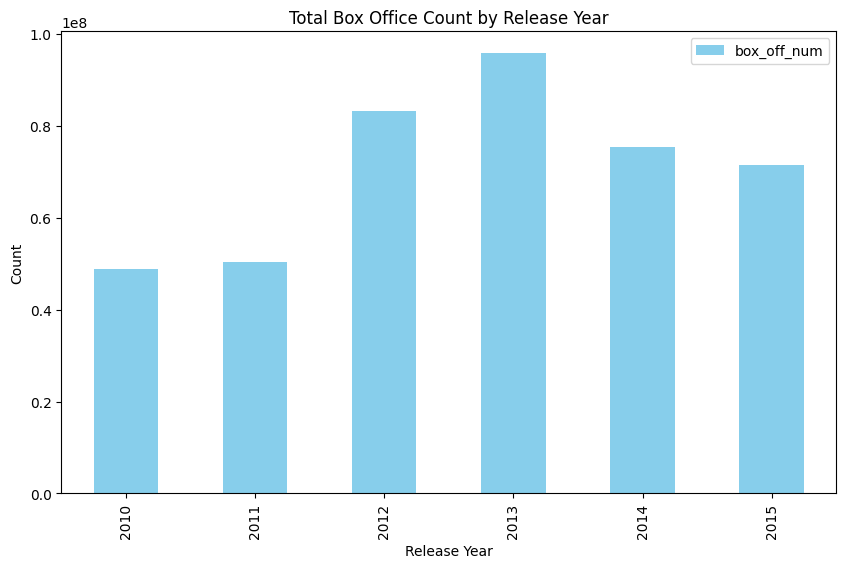

In [791]:
temp_var = totaldata['box_off_num'].groupby(totaldata['release_y']).sum()
temp_var.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Total Box Office Count by Release Year')

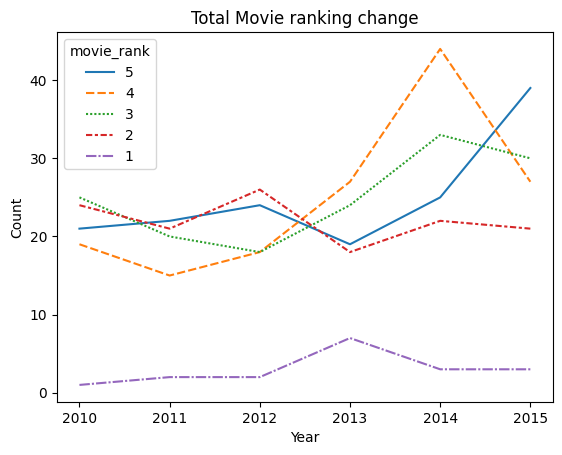

In [792]:
totaldata['movie_rank'] = pd.qcut(totaldata['box_off_num'], q=[0, 0.25, 0.50, 0.75, 0.97, 1], labels=[5,4,3,2,1])
test = pd.crosstab(totaldata['movie_rank'], totaldata['release_y'])

ax = sns.lineplot(data=test.T)
plt.title('Total Movie ranking change')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [793]:
totaldata.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num', 'release_m', 'release_y',
       'movie_rank', 'runtime'],
      dtype='object')

Text(0.5, 1.0, 'Total Genre Distribution by Release Year')

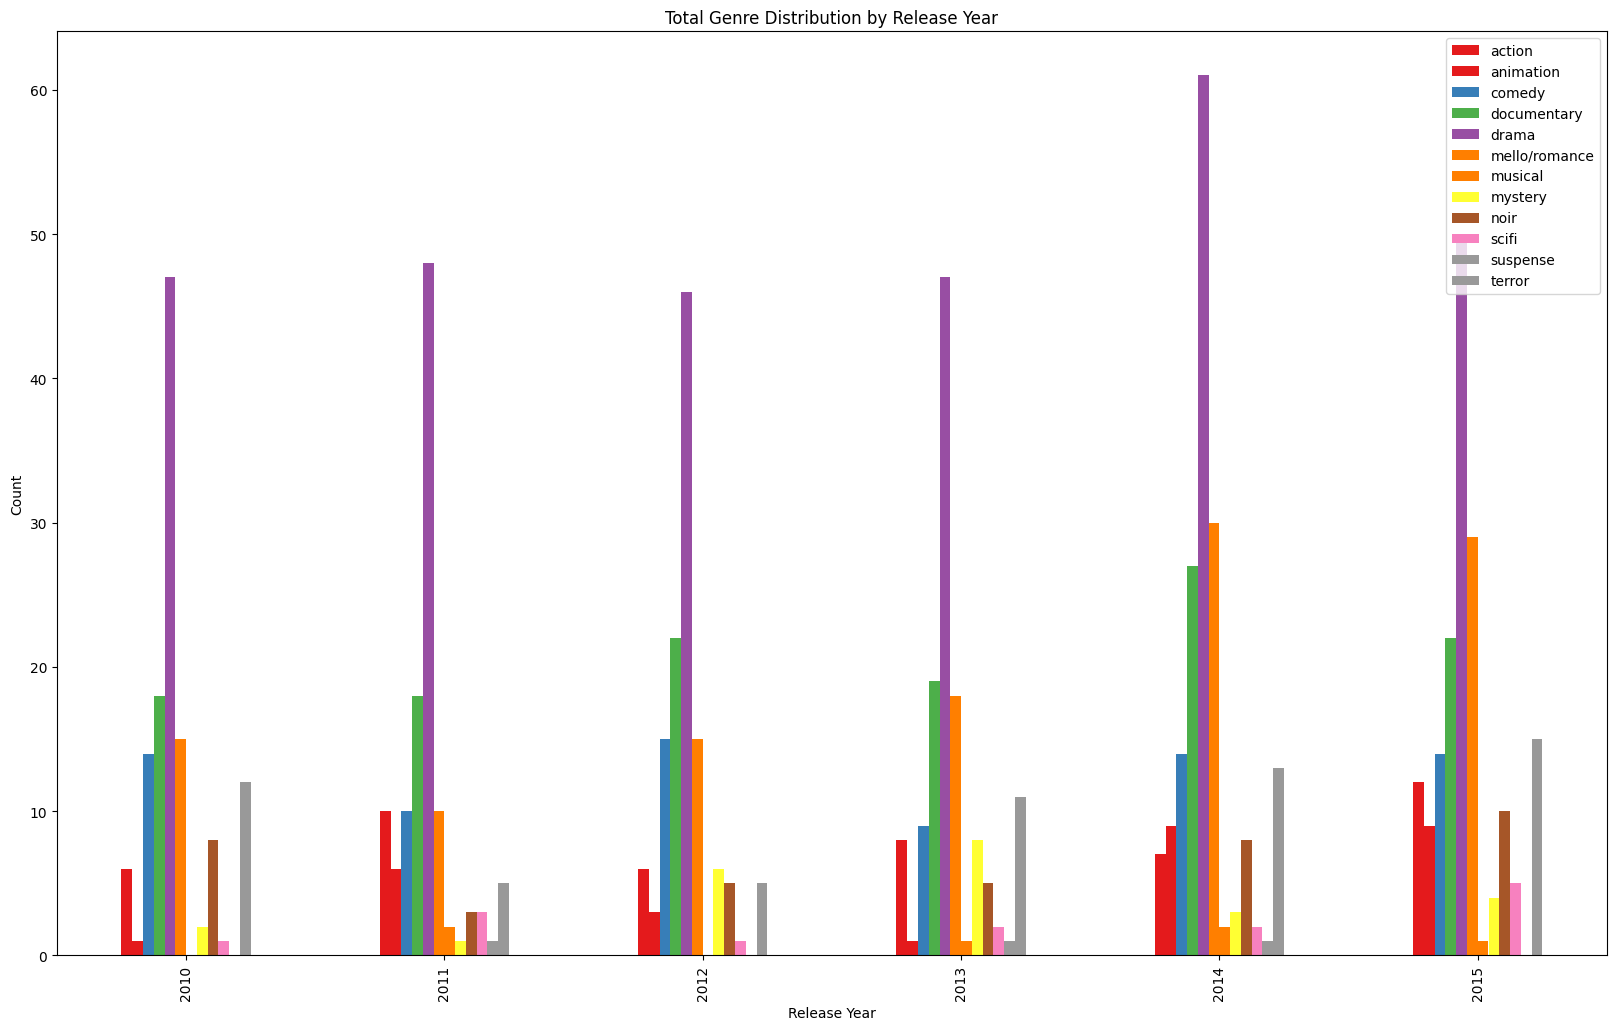

In [794]:
goodbye = pd.crosstab(totaldata['release_y'], totaldata['genre'])
goodbye.plot(kind='bar', figsize=(20, 12), colormap='Set1')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Total Genre Distribution by Release Year')

In [795]:
totaldata.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num', 'release_m', 'release_y',
       'movie_rank', 'runtime'],
      dtype='object')

In [796]:
totaldata.drop('runtime', axis=1)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_m,release_y,movie_rank
0,개들의 전쟁,롯데엔터테인먼트,action,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398.0,2012-11,2012,3
1,내부자들,쇼박스,noir,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2015-11,2015,1
2,은밀하게 위대하게,쇼박스,action,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,2013-06,2013,1
3,나는 공무원이다,NEW,comedy,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,2012-07,2012,3
4,불량남녀,쇼박스,comedy,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,2010-11,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,drama,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN,2015-11,2015,NaN
239,울보 권투부,인디스토리,documentary,2015-10-29,86,12세 관람가,이일하,0.00,0,18,2,NaN,2015-10,2015,NaN
240,어떤살인,(주)컨텐츠온미디어,noir,2015-10-28,107,청소년 관람불가,안용훈,0.00,0,224,4,NaN,2015-10,2015,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,drama,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN,2015-10,2015,NaN


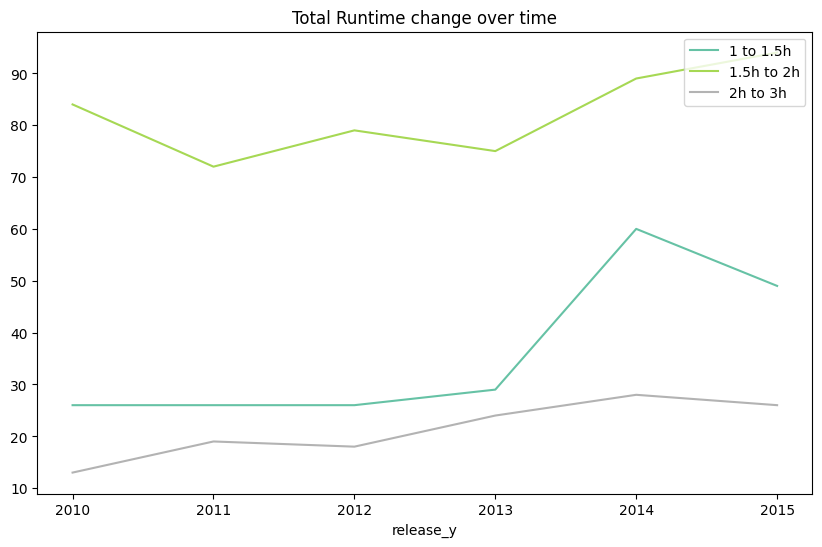

In [797]:
totaldata['runtime'] = pd.cut(totaldata['time'], bins, right=False, labels=bins_label)

total_var = pd.crosstab(totaldata['release_y'], totaldata['runtime'])
total_var.plot(figsize=(10,6), colormap='Set2')
plt.title('Total Runtime change over time')
plt.legend(loc='upper right')
plt.show()

In [798]:
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

customer_data = pd.read_csv('customer_for_cluster.csv')
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [799]:
temp_var = customer_data[['Level_score', 'Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


In [800]:
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)

In [801]:
#kmean
KMeans = KMeans(n_clusters=5,
                init='k-means++',
                n_init=10,
                verbose=True,
                max_iter=100,
                random_state=1111)
KMeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 3282.1718130185304.
Iteration 1, inertia 2522.533291612005.
Iteration 2, inertia 2393.1030119585703.
Iteration 3, inertia 2355.463532118761.
Iteration 4, inertia 2329.8254880686527.
Iteration 5, inertia 2309.6994973378196.
Iteration 6, inertia 2294.1348615689762.
Iteration 7, inertia 2285.310604630352.
Iteration 8, inertia 2279.539615153626.
Iteration 9, inertia 2275.737988219493.
Iteration 10, inertia 2273.572418819217.
Iteration 11, inertia 2272.2819356300793.
Converged at iteration 11: center shift 6.41561588683293e-05 within tolerance 0.00010000000000000034.
Initialization complete
Iteration 0, inertia 2686.24899331774.
Iteration 1, inertia 2286.8794997417317.
Iteration 2, inertia 2279.7376219648404.
Iteration 3, inertia 2276.7344606061024.
Iteration 4, inertia 2271.5141046217823.
Iteration 5, inertia 2259.467186213081.
Iteration 6, inertia 2234.0356110690673.
Iteration 7, inertia 2186.3491173864613.
Iteration 8, inertia 2115.27210422552

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=1111, verbose=True)

In [802]:
#create the name of each group
cluster_label = KMeans.labels_

customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,0
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,0
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,0
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,0
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,4
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,4
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,3
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,4


In [803]:
customer_data['Game_Name'].unique()

array(['Mine Ground'], dtype=object)

In [804]:
customer_data['Cluster'].value_counts()

Cluster
1    3913
3    3710
2    3706
0    3701
4    3476
Name: count, dtype: int64

In [805]:
temp_var = customer_data.groupby('Cluster').agg({'Time_score': 'mean', 'Level_score':'mean', 'Payment':'mean'}).round(1)
temp_var.T

Cluster,0,1,2,3,4
Time_score,73.6,54.4,47.8,40.2,62.6
Level_score,85.7,27.8,14.6,27.4,31.3
Payment,1019.3,913.2,877.0,989.5,1025.3


In [806]:
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=False)
temp_var = temp_var.rename(columns = {'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,73.6,85.7,1019.3
1,1,54.4,27.8,913.2
2,2,47.8,14.6,877.0
3,3,40.2,27.4,989.5
4,4,62.6,31.3,1025.3


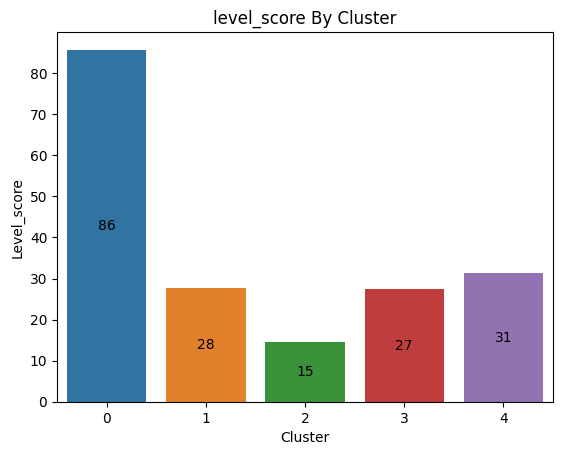

In [807]:
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('level_score By Cluster')
plt.show()

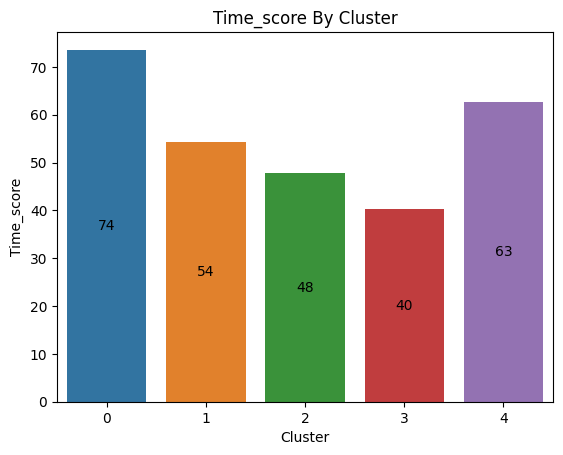

In [808]:
ax = sns.barplot(data=temp_var, x='Cluster', y='Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Time_score By Cluster')
plt.show()

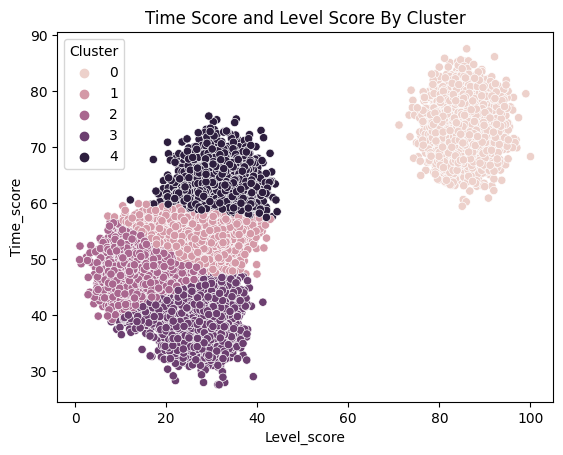

In [809]:
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue='Cluster')
plt.title('Time Score and Level Score By Cluster')
plt.show()

In [810]:
corr_data = customer_data[['Time_score', 'PK', 'BOSS', 'Gacha', 'Attack', 'Mining']].corr().round(2)
corr_data


,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


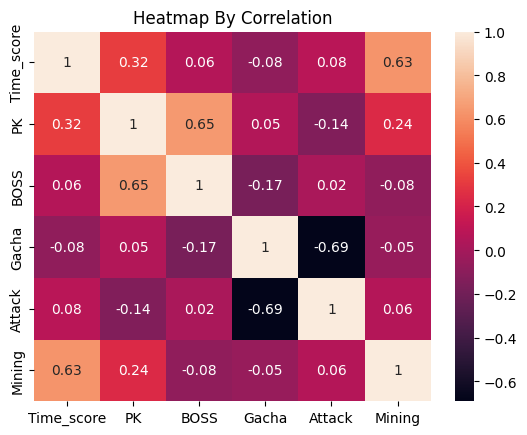

In [811]:
sns.heatmap(data = corr_data, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

In [812]:
temp_var = customer_data.groupby('Cluster').agg({'PK': 'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,54.7,59.1,49.0,45.4,70.9
1,36.5,56.9,53.9,40.6,44.3
2,36.6,56.8,53.9,40.7,44.4
3,36.2,56.8,53.8,40.6,44.3
4,36.5,56.8,54.5,40.3,44.1


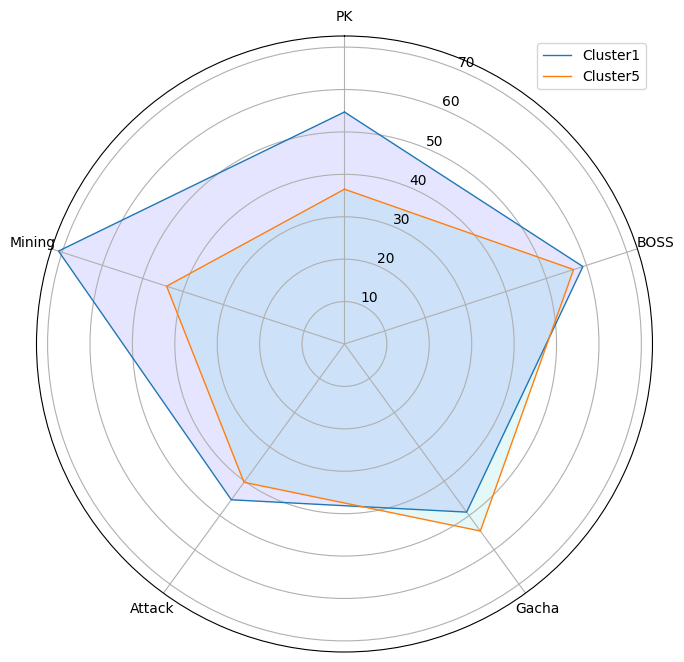

In [813]:
# Radar Chart를 이용한 집계결과 시각화
from math import pi

# Radar Chart의 각 방향 개수 정의 
# The list(temp_var) operation extracts the column names from the DataFrame and puts them into a list.
categories=list(temp_var)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(8,8)) #차트 크기
ax = plt.subplot(111, polar=True) #sub차트 생성
# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 레이더차트에 Cluster1 표기
values = temp_var.loc[0].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster5 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster5')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()

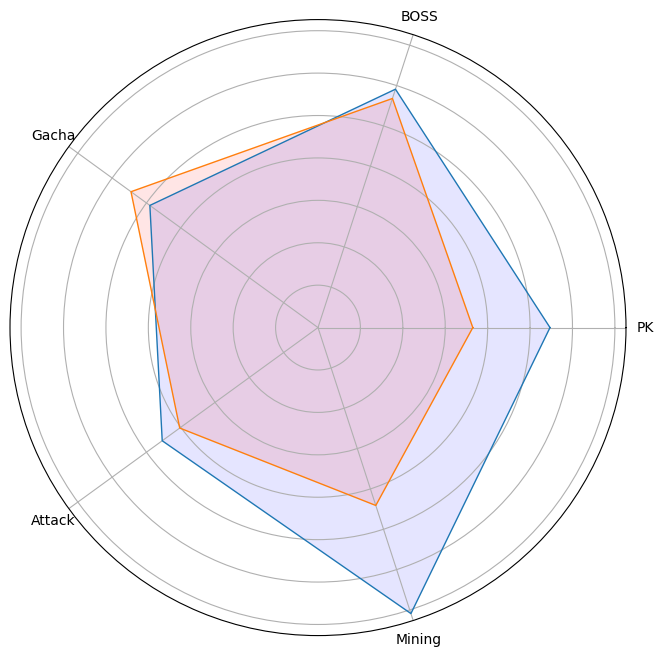

In [815]:
#radar chart 
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


# Number of variables
categories=list(temp_var)
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Repeat the first axis to close the circle

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True) 

# 레이더차트에 Cluster1 표기
values = temp_var.loc[0].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster5 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster5')
ax.fill(angles, values, 'red', alpha=0.1)
# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Display the plot
plt.show()
